In [72]:
import gym
import random
import numpy as np
from keras.models     import Sequential
from keras.layers     import Dense


In [73]:
env = gym.make('MountainCar-v0')
env.reset()
goal_steps = 200
score_requirement = -198
intial_games = 10000

In [74]:
def model_data_preparation():
    training_data = []
    accepted_scores = []
    for game_index in range(intial_games):
        score = 0
        game_memory = []
        previous_observation = []
        for step_index in range(goal_steps):
            action = random.randrange(0, 3)
            observation, reward, done, info = env.step(action)
            
            if len(previous_observation) > 0:
                game_memory.append([previous_observation, action])
                
            previous_observation = observation
            if observation[0] > -0.2:  # delf-defined
                reward = 1
            
            score += reward   
            if done:  # done in wiki: position>0.5 
                break
            
        if score >= score_requirement:
            accepted_scores.append(score)
            for data in game_memory:  # one-hot code
                if data[1] == 1:
                    output = [0, 1, 0]
                elif data[1] == 0:
                    output = [1, 0, 0]
                elif data[1] == 2:
                    output = [0, 0, 1]
                training_data.append([data[0], output])
        
        env.reset()
    
    print(accepted_scores)
    
    return training_data

In [75]:
training_data = model_data_preparation()

[-186.0, -182.0, -180.0, -190.0, -190.0, -186.0, -172.0, -188.0, -190.0, -176.0, -188.0, -194.0, -176.0, -182.0, -196.0, -176.0, -178.0, -194.0, -178.0, -188.0, -170.0, -190.0, -178.0, -184.0, -194.0, -166.0, -186.0, -196.0, -162.0, -170.0, -184.0, -196.0, -196.0, -166.0, -188.0, -176.0, -178.0, -178.0, -160.0, -174.0, -188.0, -188.0, -170.0, -172.0, -178.0, -172.0, -180.0]


#### 1

In [90]:
%%time
from keras.optimizers import Adam

def build_model(input_size, output_size):
        model = Sequential()
        model.add(Dense(128, input_dim=input_size, activation='relu'))  
        model.add(Dense(52, activation='relu'))
        model.add(Dense(output_size, activation='linear'))
        model.compile(loss='mse', optimizer=Adam()) 

        return model

def train_model(training_data):
    X = np.array([i[0] for i in training_data]).reshape(-1, len(training_data[0][0]))
    y = np.array([i[1] for i in training_data]).reshape(-1, len(training_data[0][1]))
    model = build_model(input_size=len(X[0]), output_size=len(y[0]))
    
    model.fit(X, y, epochs=5)   # train
    return model

trained_model = train_model(training_data)

# orginal experiment

scores = []
choices = []
for each_game in range(100):
    score = 0
    prev_obs = []
    for step_index in range(goal_steps):
        # Uncomment this line if you want to see how our bot playing
        # env.render()
        if len(prev_obs)==0:
            action = random.randrange(0,2)
        else:
            action = np.argmax(trained_model.predict(prev_obs.reshape(-1, len(prev_obs)))[0])
        
        choices.append(action)
        new_observation, reward, done, info = env.step(action)
        prev_obs = new_observation
        score+=reward   #direct
        if done:
            break

    env.reset()
    scores.append(score)
    
scores1_order = np.sort(scores)
avg_scores1 = sum(scores)/len(scores)
scores1_order

Epoch 1/5
9353/9353 [==============================] - 2s 203us/step - loss: 0.2275
Epoch 2/5
9353/9353 [==============================] - 0s 49us/step - loss: 0.2220
Epoch 3/5
9353/9353 [==============================] - 0s 49us/step - loss: 0.2210
Epoch 4/5
9353/9353 [==============================] - 1s 92us/step - loss: 0.2208
Epoch 5/5
9353/9353 [==============================] - 0s 47us/step - loss: 0.2205
Wall time: 13 s


array([-200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -131., -131., -129., -129.,
       -129., -129., -129., -128., -128., -128., -128., -128., -128.,
       -128., -128., -128., -128., -128., -127., -127., -127., -127.,
       -127., -127., -127., -127., -127., -127., -127., -127., -127.,
       -126., -126., -125., -125., -125., -125., -125., -125., -125.,
       -124., -124., -124., -124., -124., -124., -124., -123., -123.,
       -122., -122., -122., -122., -122., -122., -122., -122., -122.,
       -122., -121., -121., -121., -121., -121., -121., -120., -120.,
       -120.])

#### 2

In [84]:
%%time

from keras.optimizers import Adagrad

def build_model(input_size, output_size):
        model = Sequential()
        model.add(Dense(128, input_dim=input_size, activation='relu'))  
        model.add(Dense(52, activation='relu'))
        model.add(Dense(output_size, activation='linear'))
        model.compile(loss='mse', optimizer=Adagrad()) 

        return model

def train_model(training_data):
    X = np.array([i[0] for i in training_data]).reshape(-1, len(training_data[0][0]))
    y = np.array([i[1] for i in training_data]).reshape(-1, len(training_data[0][1]))
    model = build_model(input_size=len(X[0]), output_size=len(y[0]))
    
    model.fit(X, y, epochs=5)   # train
    return model

trained_model = train_model(training_data)

# orginal experiment

scores = []
choices = []
for each_game in range(100):
    score = 0
    prev_obs = []
    for step_index in range(goal_steps):
        # Uncomment this line if you want to see how our bot playing
        # env.render()
        if len(prev_obs)==0:
            action = random.randrange(0,2)
        else:
            action = np.argmax(trained_model.predict(prev_obs.reshape(-1, len(prev_obs)))[0])
        
        choices.append(action)
        new_observation, reward, done, info = env.step(action)
        prev_obs = new_observation
        score+=reward   ## default reward
        if done:
            break

    env.reset()
    scores.append(score)
    
scores2_order = np.sort(scores)
avg_scores2 = sum(scores)/len(scores)
scores2_order

Epoch 1/5
9353/9353 [==============================] - 1s 154us/step - loss: 0.2243
Epoch 2/5
9353/9353 [==============================] - 0s 48us/step - loss: 0.2219
Epoch 3/5
9353/9353 [==============================] - 0s 46us/step - loss: 0.2216
Epoch 4/5
9353/9353 [==============================] - 0s 46us/step - loss: 0.2214
Epoch 5/5
9353/9353 [==============================] - 0s 42us/step - loss: 0.2212
Wall time: 11.9 s


array([-200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -197., -196., -195., -190., -188.,
       -187., -187., -187., -185., -183., -182., -182., -182., -182.,
       -182., -181., -181., -181., -181., -180., -180., -179., -179.,
       -179., -179., -179., -178., -178., -178., -178., -178., -178.,
       -178., -178., -178., -178., -178., -177., -177., -177., -177.,
       -177., -177., -177., -177., -142., -122., -113., -113., -110.,
       -109., -108., -108., -106., -104., -104., -103., -102., -101.,
       -100.,  -99.,  -99.,  -99.,  -99.,  -98.,  -98.,  -97.,  -97.,
        -97.])

#### 3

In [87]:
%%time
from keras.optimizers import Adadelta

def build_model(input_size, output_size):
        model = Sequential()
        model.add(Dense(128, input_dim=input_size, activation='relu'))  
        model.add(Dense(52, activation='relu'))
        model.add(Dense(output_size, activation='linear'))
        model.compile(loss='mse', optimizer=Adadelta()) 

        return model

def train_model(training_data):
    X = np.array([i[0] for i in training_data]).reshape(-1, len(training_data[0][0]))
    y = np.array([i[1] for i in training_data]).reshape(-1, len(training_data[0][1]))
    model = build_model(input_size=len(X[0]), output_size=len(y[0]))
    
    model.fit(X, y, epochs=5)   # train
    return model

trained_model = train_model(training_data)

# orginal experiment

scores = []
choices = []
for each_game in range(100):
    score = 0
    prev_obs = []
    for step_index in range(goal_steps):
        # Uncomment this line if you want to see how our bot playing
        # env.render()
        if len(prev_obs)==0:
            action = random.randrange(0,2)
        else:
            action = np.argmax(trained_model.predict(prev_obs.reshape(-1, len(prev_obs)))[0])
        
        choices.append(action)
        new_observation, reward, done, info = env.step(action)
        prev_obs = new_observation
        score+=reward   # default reward
        if done:
            break

    env.reset()
    scores.append(score)
    
scores3_order = np.sort(scores)
avg_scores3 = sum(scores)/len(scores)
scores3_order

Epoch 1/5
9353/9353 [==============================] - 2s 190us/step - loss: 0.2272
Epoch 2/5
9353/9353 [==============================] - 0s 48us/step - loss: 0.2229
Epoch 3/5
9353/9353 [==============================] - 0s 49us/step - loss: 0.2225
Epoch 4/5
9353/9353 [==============================] - 0s 48us/step - loss: 0.2224
Epoch 5/5
9353/9353 [==============================] - 1s 64us/step - loss: 0.2223
Wall time: 14.6 s


array([-200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200.])

#### 4

In [94]:
%%time
from keras.optimizers import Adamax

def build_model(input_size, output_size):
        model = Sequential()
        model.add(Dense(128, input_dim=input_size, activation='relu'))  
        model.add(Dense(52, activation='relu'))
        model.add(Dense(output_size, activation='linear'))
        model.compile(loss='hinge', optimizer=Adamax()) 

        return model

def train_model(training_data):
    X = np.array([i[0] for i in training_data]).reshape(-1, len(training_data[0][0]))
    y = np.array([i[1] for i in training_data]).reshape(-1, len(training_data[0][1]))
    model = build_model(input_size=len(X[0]), output_size=len(y[0]))
    
    model.fit(X, y, epochs=5)   # train
    return model

trained_model = train_model(training_data)

# orginal experiment

scores = []
choices = []
for each_game in range(100):
    score = 0
    prev_obs = []
    for step_index in range(goal_steps):
#         Uncomment this line if you want to see how our bot playing
#        env.render()
        if len(prev_obs)==0:
            action = random.randrange(0,2)
        else:
            action = np.argmax(trained_model.predict(prev_obs.reshape(-1, len(prev_obs)))[0])
        
        choices.append(action)
        new_observation, reward, done, info = env.step(action)
        prev_obs = new_observation
        score+=reward   ## default reward
        if done:
            break

    env.reset()
    scores.append(score)
    
scores4_order = np.sort(scores)
avg_scores4 = sum(scores)/len(scores)
scores4_order

Epoch 1/5
9353/9353 [==============================] - 2s 205us/step - loss: 0.6895
Epoch 2/5
9353/9353 [==============================] - 0s 49us/step - loss: 0.6667
Epoch 3/5
9353/9353 [==============================] - 1s 58us/step - loss: 0.6667
Epoch 4/5
9353/9353 [==============================] - 0s 52us/step - loss: 0.6667
Epoch 5/5
9353/9353 [==============================] - 0s 52us/step - loss: 0.6667
Wall time: 16.4 s


array([-200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200.])

#### 5

In [92]:
%%time
from keras.optimizers import RMSprop

def build_model(input_size, output_size):
        model = Sequential()
        model.add(Dense(128, input_dim=input_size, activation='relu'))  
        model.add(Dense(52, activation='relu'))
        model.add(Dense(output_size, activation='linear'))
        model.compile(loss='hinge', optimizer=RMSprop()) 

        return model

def train_model(training_data):
    X = np.array([i[0] for i in training_data]).reshape(-1, len(training_data[0][0]))
    y = np.array([i[1] for i in training_data]).reshape(-1, len(training_data[0][1]))
    model = build_model(input_size=len(X[0]), output_size=len(y[0]))
    
    model.fit(X, y, epochs=5)   # train
    return model

trained_model = train_model(training_data)

# orginal experiment

scores = []
choices = []
for each_game in range(100):
    score = 0
    prev_obs = []
    for step_index in range(goal_steps):
#         Uncomment this line if you want to see how our bot playing
#        env.render()
        if len(prev_obs)==0:
            action = random.randrange(0,2)
        else:
            action = np.argmax(trained_model.predict(prev_obs.reshape(-1, len(prev_obs)))[0])
        
        choices.append(action)
        new_observation, reward, done, info = env.step(action)
        prev_obs = new_observation
        score+=reward   ## default reward
        if done:
            break

    env.reset()
    scores.append(score)
    
scores5_order = np.sort(scores)
avg_scores5 = sum(scores)/len(scores)
scores5_order

Epoch 1/5
9353/9353 [==============================] - 2s 220us/step - loss: 0.6880
Epoch 2/5
9353/9353 [==============================] - 1s 84us/step - loss: 0.6667
Epoch 3/5
9353/9353 [==============================] - 1s 59us/step - loss: 0.6667
Epoch 4/5
9353/9353 [==============================] - 1s 81us/step - loss: 0.6667
Epoch 5/5
9353/9353 [==============================] - 0s 53us/step - loss: 0.6667
Wall time: 16.5 s


array([-200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200.])

#### 6

In [97]:
%%time
#from keras.optimizers import sgd

def build_model(input_size, output_size):
        model = Sequential()
        model.add(Dense(128, input_dim=input_size, activation='relu'))  
        model.add(Dense(52, activation='relu'))
        model.add(Dense(output_size, activation='linear'))
        model.compile(loss='hinge', optimizer='sgd') 

        return model

def train_model(training_data):
    X = np.array([i[0] for i in training_data]).reshape(-1, len(training_data[0][0]))
    y = np.array([i[1] for i in training_data]).reshape(-1, len(training_data[0][1]))
    model = build_model(input_size=len(X[0]), output_size=len(y[0]))
    
    model.fit(X, y, epochs=5)   # train
    return model

trained_model = train_model(training_data)

# orginal experiment

scores = []
choices = []
for each_game in range(100):
    score = 0
    prev_obs = []
    for step_index in range(goal_steps):
#         Uncomment this line if you want to see how our bot playing
#        env.render()
        if len(prev_obs)==0:
            action = random.randrange(0,2)
        else:
            action = np.argmax(trained_model.predict(prev_obs.reshape(-1, len(prev_obs)))[0])
        
        choices.append(action)
        new_observation, reward, done, info = env.step(action)
        prev_obs = new_observation
        score+=reward   ## default reward
        if done:
            break

    env.reset()
    scores.append(score)
    
scores6_order = np.sort(scores)
avg_scores6 = sum(scores)/len(scores)
scores6_order

Epoch 1/5
9353/9353 [==============================] - 2s 205us/step - loss: 0.7934
Epoch 2/5
9353/9353 [==============================] - 1s 68us/step - loss: 0.6671
Epoch 3/5
9353/9353 [==============================] - 1s 63us/step - loss: 0.6667
Epoch 4/5
9353/9353 [==============================] - 1s 69us/step - loss: 0.6667
Epoch 5/5
9353/9353 [==============================] - 0s 48us/step - loss: 0.6667
Wall time: 19 s


array([-200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200., -200., -200., -200., -200., -200., -200., -200., -200.,
       -200.])

### plot

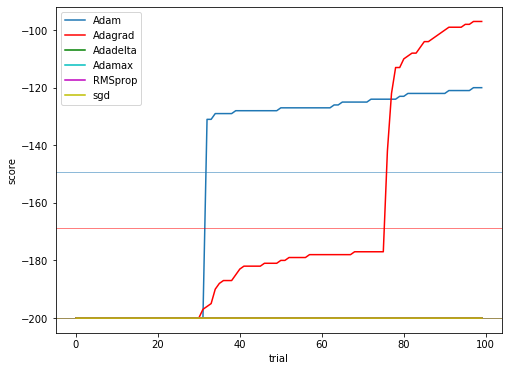

In [115]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(scores1_order, label='Adam')
ax.axhline(avg_scores1, linewidth=0.5)  # color='blue', linewidth=0.5

ax.plot(scores2_order, color='r', label='Adagrad')
ax.axhline(avg_scores2, color='r',linewidth=0.5)

ax.plot(scores3_order, color='g', label='Adadelta')
ax.axhline(avg_scores3, color='g',linewidth=0.5)

ax.plot(scores4_order, color='c', label='Adamax')
ax.axhline(avg_scores4, color='c',linewidth=0.5)

ax.plot(scores5_order, color='m', label='RMSprop')
ax.axhline(avg_scores5, color='m',linewidth=0.5)

ax.plot(scores6_order, color='y', label='sgd')
ax.axhline(avg_scores6, color='y',linewidth=0.5)

ax.legend(loc='upper left')
ax.margins(0.05)
#ax.set_title('results with different optimizer')
ax.set_xlabel('trial')
ax.set_ylabel('score')



plt.savefig('optimizer.png')
# ax.set_rasterized(True)
# plt.savefig('optimizer.eps', format='eps')

plt.show()